## Введение в анализ данных и машинное обучение на Python

### Тема 7: Линейная регрессия (7 декабря 2019)

---

__Часть 1: Подготовка данных__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Продолжаем работать с набором данных `Boston`.

In [2]:
from sklearn.datasets import load_boston # Импортировать набор данных
boston_data = load_boston() # Загрузить данные 

X = boston_data['data']
Y = boston_data['target']

X = pd.DataFrame(X) # Создание DataFrame на основе признаков

X.columns = boston_data['feature_names'] # Имена столбцов

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Разобьём данные на тренировочную и тестовую выборку:

__Задание 1:__ Импортируйте класс `train_test_split` из модуля `model_selection` библиотеки `sklearn`.

In [5]:
from sklearn.model_selection import train_test_split

__Задание 2:__ Разбейте выборку на тренировочную и тестовую. Доля наблюдений тестовой выборки должна равняться 0.3 Проверьте размеры выборок.

In [6]:
np.random.seed(123) # Важно!

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [9]:
X_train.shape

(354, 13)

In [10]:
X_test.shape

(152, 13)

In [11]:
X.shape

(506, 13)

In [13]:
y_train.shape

(354,)

---

__Часть 3: Построение парной регрессии__

__Задание 1:__ Импортируйте класс `Linear Regression` из модуля `linear_model` библиотеки `sklearn`. 

In [14]:
from sklearn.linear_model import LinearRegression

__Задание 2:__ Обучите следующую модель парной регрессии:
$$
Y_i = \beta_0 + \beta_1LSTAT_i + u_i
$$

In [15]:
model = LinearRegression()

In [17]:
model.fit(np.array(X_train['LSTAT']).reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Задание 3:__ Получите коэффициенты модели. Постройте диаграмму рассеяния с нанесённой линией оценённой регрессии. Интерпретируйте результат.

In [18]:
model.coef_ # beta1 hat

array([-0.95406451])

In [19]:
model.intercept_ #beta2 hat

34.77601606390703

Text(0, 0.5, 'Y')

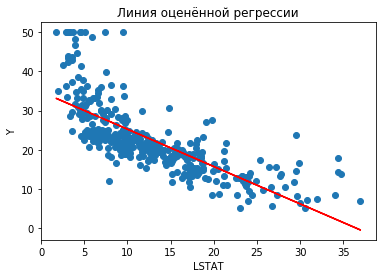

In [25]:
plt.scatter(X_train['LSTAT'], y_train)

y_hat = model.intercept_ + model.coef_ * X_train['LSTAT']

plt.plot(X_train['LSTAT'], y_hat, c = 'r')
plt.title('Линия оценённой регрессии')
plt.xlabel('LSTAT')
plt.ylabel('Y')

__Задание 4:__ Сделайте предсказания для тестовой выборки. Рассчитайте MSE (`sklearn.metrics.mean_squared_error`). Рассчитайте $R^2$ (`sklearn.metrics.r2_score`). Сделайте вывод о предсказательной силе модели.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
pred = model.predict(np.array(X_test['LSTAT']).reshape(-1, 1))

In [29]:
pred

array([25.13042388, 28.54597482, 31.18873351, 21.32370649, 30.4254819 ,
       29.72901481, 29.80533997,  7.06044208, 12.74666655, 27.28660967,
       27.68731676, 24.70109485, 15.37034395, 29.52866126, 17.98448071,
       22.11558003, 21.81027939, 27.84950773, 19.56822779, 17.46928587,
       18.26115941, 26.30392322, 29.96753094, 31.90428189, 31.21735545,
       24.68201356, 19.29154908, 25.97954129, 27.30569096, 24.63431033,
       27.45834128, 31.93290383, 20.92299939, 23.89014002, 26.24667935,
       24.04279034, 28.85127546, 16.79190007, 17.26893233, 31.78979415,
       29.91028707, 18.46151296, 23.20321357, 32.94421221,  5.38128854,
       26.92406516, 26.69508967, 27.23890644, 19.22476457, 21.95338906,
       31.40816835, 22.23006777, 26.89544322, 11.34419172, 23.29862002,
       17.80320845,  7.75690917,  5.55302016, 30.18696578, 14.88377105,
       23.07918518, 26.11311032, 20.44596714, 21.29508455, 21.88660455,
       27.5251258 , 28.36470256, 23.29862002, 29.50957997, 30.30

In [30]:
mean_squared_error(y_test, pred)

38.68755662089716

In [31]:
r2_score(y_test, pred)

0.5213600145642237

---

__Часть 4: Построение множественной регрессии__

__Задание 1:__ Обучите следующую модель:
$$
Y_i = X\beta + u,
$$
где $X = (1, LSTAT, AGE, RM)$.

Интерпретируйте результат. Сравните предсказательную силу этой модели с моделью из предыдущей части. 

In [32]:
model2 = LinearRegression()

In [34]:
model2.fit(X_train[['LSTAT', 'AGE', 'RM']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model2.intercept_

-7.876695000068445

In [36]:
model2.coef_

array([-6.01343137e-01,  4.27048335e-03,  6.00588725e+00])

In [38]:
preds2 = model2.predict(X_test[['LSTAT', 'AGE', 'RM']])

In [39]:
preds2

array([21.04666714, 28.25514092, 37.1037393 , 17.93971232, 31.33758228,
       42.02791296, 27.85883967, 13.7232138 , 10.76080179, 30.06131628,
       24.82758931, 21.43234764, 16.91768413, 26.74815984, 15.71603644,
       20.58688115, 19.72386223, 33.30360719, 17.57012916, 14.21629474,
       16.71016378, 22.45060087, 31.26302485, 36.44051323, 30.4310224 ,
       23.89189304, 20.56404093, 22.37738184, 23.73579653, 24.56343459,
       28.54141007, 31.67843038, 20.97640244, 20.60457494, 24.69247638,
       29.76689129, 25.81494682, 20.16321405, 15.73391759, 38.89783131,
       30.89519269, 18.26651895, 18.9370768 , 38.24601999,  6.4286853 ,
       26.06646985, 22.30955718, 25.35917977, 18.30214044, 28.38038705,
       30.72884869, 21.46367628, 23.14914983, 10.93386354, 20.61928215,
       19.92041627,  6.64037   ,  0.32734833, 32.8610448 , 12.3793837 ,
       23.16130713, 23.74668538, 20.39209139, 18.42006847, 19.60097044,
       25.67500921, 26.06889016, 23.79640482, 25.26290685, 29.90

In [40]:
mean_squared_error(y_test, preds2)

39.34719550173767

In [41]:
r2_score(y_test, preds2)

0.5131990043610661